#  Data Structures- Hashmaps, Sets, Hash Tables, Hashing and Collisions
> Observing hashmaps with python dictionaries
- toc: true
- image: /images/WLR.png
- week: 28

## What is a Hashtable/Hashmap?

> A hashtable is a data structure that with a collection of key-value pairs, where each key maps to a value, and the keys must be unique and hashable.

- In Python there is a built in hashtable known as a dictionary.

> The primary purpose of a hashtable is to provide efficient lookup, insertion, and deletion operations. When an element is to be inserted into the hashtable, a hash function is used to map the key to a specific index in the underlying array that is used to store the key-value pairs. The value is then stored at that index. When searching for a value, the hash function is used again to find the index where the value is stored.

> The key advantage of a hashtable over other data structures like arrays and linked lists is its average-case time complexity for lookup, insertion, and deletion operations.

- The typical time complexity of a hashtable is O(1), also considered constant time. 


## What is Hashing and Collision?

> Hashing is the process of mapping a given key to a value in a hash table or hashmap, using a hash function. The hash function takes the key as input and produces a hash value or hash code, which is then used to determine the index in the underlying array where the value is stored. The purpose of hashing is to provide a quick and efficient way to access data, by eliminating the need to search through an entire data structure to find a value.

> However, it is possible for two different keys to map to the same hash value, resulting in a collision. When a collision occurs, there are different ways to resolve it, depending on the collision resolution strategy used.

> Python's dictionary implementation is optimized to handle collisions efficiently, and the performance of the dictionary is generally very good, even in the presence of collisions. However, if the number of collisions is very high, the performance of the dictionary can degrade, so it is important to choose a good hash function that minimizes collisions when designing a Python dictionary.

## What is a Set?

In [1]:
# Creating a set using set() function
my_set = set([1, 2, 3, 2, 1])
print(my_set)  

# What do you notice in the output?
# It doesn't print out the number again if it is repeated, and already mentioned once

# Why do you think Sets are in the same tech talk as Hashmaps/Hashtables?
# There will never be a duplicate in either.

{1, 2, 3}


## Dictionary Example

Below are just some basic features of a dictionary. As always, documentation is always the main source for all the full capablilties. 

-----Album Information-----
Whole Lotta Red
Playboi Carti
December 25, 2020

-----Album Cover-----



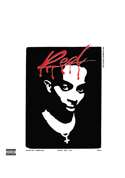


-----Tracklist-----
{'title': 'Whole Lotta Red', 'artist': 'Playboi Carti', 'year': 2020, 'genre': ['Rap', 'HipHop'], 'tracks': {1: 'Rockstar Made', 2: 'Go2DaMoon', 3: 'Stop Breathing', 4: 'Beno !', 5: 'JumpOutTheHouse', 6: 'M3tamorphosis', 7: 'Slay3r', 8: 'No Sl33p', 9: 'New Tank', 10: 'Teen X', 11: 'Meh', 12: 'Vamp Anthem', 13: 'New N3on', 14: 'Control', 15: 'Punk Monk', 16: 'On That Time', 17: 'King Vamp', 18: 'Place', 19: 'Sky', 20: 'Over', 21: 'ILoveUIHateU', 22: 'Die4Guy', 23: 'Not PLaying', 24: 'F33l Lik3 Dyin'}}


In [47]:
from IPython.display import HTML, display
from pathlib import Path 
from PIL import Image as pilImage 
from io import BytesIO
import base64

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def scale_image(img):
    baseWidth = 125
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    image['width'], image['height'] = img.size
    image['pixels'] = image['width'] * image['height']
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    image['scaled_width'], image['scaled_height'] = img.size
    image['scaled_pixels'] = image['scaled_width'] * image['scaled_height']
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])


if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data(images = [{'source': "Playboi Carti", 'label': "Whole Lotta Red", 'file': "WLR.png"}])
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("-----Album Information-----")
        print(image['label'])
        print(image['source'])
        print("December 25, 2020")
        print("")
        
        print("-----Album Cover-----")
        display(HTML(image['html'])) 
        print("")
        print("-----Tracklist-----")

WLR = {
    "title": "Whole Lotta Red",
    "artist": "Playboi Carti",
    "year": 2020,
    "genre": ["Rap", "HipHop"],
    "tracks": {
        1: "Rockstar Made",
        2: "Go2DaMoon",
        3: "Stop Breathing",
        4: "Beno !",
        5: "JumpOutTheHouse",
        6: "M3tamorphosis",
        7: "Slay3r",
        8: "No Sl33p",
        9: "New Tank",
        10: "Teen X",
        11: "Meh",
        12: "Vamp Anthem",
        13: "New N3on",
        14: "Control",
        15: "Punk Monk",
        16: "On That Time",
        17: "King Vamp",
        18: "Place",
        19: "Sky",
        20: "Over",
        21: "ILoveUIHateU",
        22: "Die4Guy",
        23: "Not PLaying",
        24: "F33l Lik3 Dyin"
    }
}

# What data structures do you see?
# I recognize a dictionary because it contains the curly brackets, integers, and strings.

# Printing the dictionary
print(WLR)

In [3]:
# Retrieve value from dictionary with key
print(WLR.get('tracks'))
# or
print(WLR['tracks'])

{1: 'I Forgot That You Existed', 2: 'Cruel Summer', 3: 'Lover', 4: 'The Man', 5: 'The Archer', 6: 'I Think He Knows', 7: 'Miss Americana & The Heartbreak Prince', 8: 'Paper Rings', 9: 'Cornelia Street', 10: 'Death By A Thousand Cuts', 11: 'London Boy', 12: "Soon You'll Get Better (feat. Dixie Chicks)", 13: 'False God', 14: 'You Need To Calm Down', 15: 'Afterglow', 16: 'Me! (feat. Brendon Urie of Panic! At The Disco)', 17: "It's Nice To Have A Friend", 18: 'Daylight'}
{1: 'I Forgot That You Existed', 2: 'Cruel Summer', 3: 'Lover', 4: 'The Man', 5: 'The Archer', 6: 'I Think He Knows', 7: 'Miss Americana & The Heartbreak Prince', 8: 'Paper Rings', 9: 'Cornelia Street', 10: 'Death By A Thousand Cuts', 11: 'London Boy', 12: "Soon You'll Get Better (feat. Dixie Chicks)", 13: 'False God', 14: 'You Need To Calm Down', 15: 'Afterglow', 16: 'Me! (feat. Brendon Urie of Panic! At The Disco)', 17: "It's Nice To Have A Friend", 18: 'Daylight'}


In [41]:
# Retrieve value from a dictionary inside a dictionary
print(WLR.get('tracks')[3])
# or
print(WLR['tracks'][9])

Stop Breathing
New Tank


In [42]:
# adding a value with a new key
WLR["producer"] = set(['Playboi Carti', 'Pierre Bourne', 'Maaly Raw', 'Wheezy', 'F1lthy'])

# What can you change to make sure there are no duplicate producers?
# add 'set' in front of the list of producers

# Printing the dictionary
print(WLR)

{'title': 'Whole Lotta Red', 'artist': 'Playboi Carti', 'year': 2020, 'genre': ['Rap', 'HipHop'], 'tracks': {1: 'Rockstar Made', 2: 'Go2DaMoon', 3: 'Stop Breathing', 4: 'Beno !', 5: 'JumpOutTheHouse', 6: 'M3tamorphosis', 7: 'Slay3r', 8: 'No Sl33p', 9: 'New Tank', 10: 'Teen X', 11: 'Meh', 12: 'Vamp Anthem', 13: 'New N3on', 14: 'Control', 15: 'Punk Monk', 16: 'On That Time', 17: 'King Vamp', 18: 'Place', 19: 'Sky', 20: 'Over', 21: 'ILoveUIHateU', 22: 'Die4Guy', 23: 'Not PLaying', 24: 'F33l Lik3 Dyin'}, 'producer': {'F1lthy', 'Maaly Raw', 'Wheezy', 'Pierre Bourne', 'Playboi Carti'}}


In [43]:
# Adding a an key-value pair to an existing key 
WLR["tracks"].update({21: "ILoveUIHateU"})
WLR["genre"].append("Vamp‼️🩸")
# How would add an additional genre to the dictionary, like electropop? 
# add 'append' and then the genre you would like to add

# Printing the dictionary
print(WLR)

{'title': 'Whole Lotta Red', 'artist': 'Playboi Carti', 'year': 2020, 'genre': ['Rap', 'HipHop', 'Vamp‼️🩸'], 'tracks': {1: 'Rockstar Made', 2: 'Go2DaMoon', 3: 'Stop Breathing', 4: 'Beno !', 5: 'JumpOutTheHouse', 6: 'M3tamorphosis', 7: 'Slay3r', 8: 'No Sl33p', 9: 'New Tank', 10: 'Teen X', 11: 'Meh', 12: 'Vamp Anthem', 13: 'New N3on', 14: 'Control', 15: 'Punk Monk', 16: 'On That Time', 17: 'King Vamp', 18: 'Place', 19: 'Sky', 20: 'Over', 21: 'ILoveUIHateU', 22: 'Die4Guy', 23: 'Not PLaying', 24: 'F33l Lik3 Dyin'}, 'producer': {'F1lthy', 'Maaly Raw', 'Wheezy', 'Pierre Bourne', 'Playboi Carti'}}


In [7]:
# Print lover_album in more readable format
# for k,v in WLR.items(): # iterate using a for loop for key and value
#    print(str(k) + ": " + str(v))
# Write your own code to print tracks in readable format
for k,v in WLR["tracks"].items():
    print(k,":",v)

1 : Rockstar Made
2 : Go2DaMoon
3 : Stop Breathing
4 : Beno !
5 : JumpOutTheHouse
6 : M3tamorphosis
7 : Slay3r
8 : No Sl33p
9 : New Tank
10 : Teen X
11 : Meh
12 : Vamp Anthem
13 : New N3on
14 : Control
15 : Punk Monk
16 : On That Time
17 : King Vamp
18 : Place
19 : Sky
20 : Over
21 : ILoveUIHateU
22 : Die4Guy
23 : Not PLaying
24 : F33l Lik3 Dyin


In [11]:
# Using conditionals to retrieve a random song
# def search():
#     search = input("What would you like to know about the album?")
#     if WLR.get(search.lower()) == None:
#         print("Invalid Search")
#     else:
#         print(WLR.get(search.lower()))

# search()

# This is a very basic code segment, how can you improve upon this code?
# We can add a while loop so that if the user misinputs something, then it will ask them to keep entering until it has been valid data within the dictionary

def search():
    while True:
        search = input("What would you like to know about the album?")
        if not search:
            print("Please enter a valid search term.")
        elif search.lower() not in WLR:
            print("Sorry, we could not find any information about that. Please try again.")
        else:
            print(WLR.get(search.lower()))
            break

search()


Sorry, we could not find any information about that. Please try again.
{1: 'Rockstar Made', 2: 'Go2DaMoon', 3: 'Stop Breathing', 4: 'Beno !', 5: 'JumpOutTheHouse', 6: 'M3tamorphosis', 7: 'Slay3r', 8: 'No Sl33p', 9: 'New Tank', 10: 'Teen X', 11: 'Meh', 12: 'Vamp Anthem', 13: 'New N3on', 14: 'Control', 15: 'Punk Monk', 16: 'On That Time', 17: 'King Vamp', 18: 'Place', 19: 'Sky', 20: 'Over', 21: 'ILoveUIHateU', 22: 'Die4Guy', 23: 'Not PLaying', 24: 'F33l Lik3 Dyin'}


## Hacks

- Answer *ALL* questions in the code segments
- Create a diagram or comparison illustration (Canva).
    - What are the pro and cons of using this data structure? 
    - Dictionary vs List    
- Expand upon the code given to you, possible improvements in comments
- Build your own album showing features of a python dictionary

- For Mr. Yeung's class: Justify your favorite Taylor Swift song, answer may effect seed

![](https://user-images.githubusercontent.com/111609656/229336298-f4249c6b-8fab-48d6-9fc1-8b403e78d1ab.png)

![](https://user-images.githubusercontent.com/111609656/229336299-cabaae40-a9c1-4d16-b146-2b10e401c35b.png)

My favorite Taylor Swift song is "Shake It Off," which was released in 2014, from the album '1989'. My taste of music is more upbeat and catchy music with strong lyrical music, and Taylor Swift killed it with this song, as she shows traits of resilience and self confidence. Swift talks about the negative comments she received in her life and expresses it through this song, encouraging her audience to "shake it off" and not be let down of yourself through other people's words. This is very reasonable for any audience, but as a highschooler, I feel that this song truly important as you can receive lots of hate from other students, but you have to not let it affect you, which is something I have learned from this song. "Shake It Off" encourages listeners to keep going and not give up, which can be a powerful message for young people who are still figuring out their place in the world, such as highschoolers like me. Overall, "Shake It Off" is my favorite Taylor Swift song because of its catchy beat, uplifting message, and relatable themes of self-confidence and resilience. This song was one of the first song's I've listened to from a young little kid and is the primary reason of why I enjoy listening to music nowadays.